In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_bits (n_x, m):
    np.random.seed(1)
    data = np.random.randint(2, size = (n_x, m))
    return data

In [3]:
def generate_label (data, m):
    lst_y = []
    y = np.empty((m, 1))
    k = 0
    
    for tmp in data.T:
        xor = np.logical_xor(tmp[0], tmp[1])
        for i in range(2, tmp.shape[0]):
            xor = np.logical_xor(xor, tmp[i])
        lst_y.append(int(xor))
        y[k, :] = int(xor)
        k = k + 1
    
    return y.T

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def initialize_params(n_x):
    w = np.zeros(shape = (n_x, 1))
    b = 0
    return (w, b)

In [6]:
def get_activation_loss (x, w, b):
    z = np.dot(w.T, x) + b
    a = sigmoid(z)
    cost = (1 / m) * np.sum(-1 * (y * np.log(a) + (1 - y) * np.log(1 - a)))
    return a, cost, z

In [7]:
def update_params (x, w, b, a, y, lr, m):
    dw = (1 / m) * np.dot(x, (a - y).T)
    db = (1 / m) * np.sum(a - y)
    
    w = w - lr * dw
    b = b - lr * db
    
    return w, b

In [8]:
def plt_res(lst, ylab, lr):
    plt.plot(lst)
    plt.ylabel(ylab)
    plt.xlabel('iterations')
    plt.title('Learning rate = ' + str(lr))
    plt.show()

In [9]:
def optimize_parameters(x, y, w, b, n_x, lr, num_iter):
    lst_cost = []
    w, b = initialize_params(n_x)
    
    for i in range(num_iter):
        a, cost, z = get_activation_loss(x, w, b)
        w, b = update_params(x, w, b, a, y, lr, m)
        lst_cost.append(cost)
        
    return w, b, lst_cost

In [10]:
n_x = 50
m = 10000
num_iter = 1000
w, b = initialize_params(n_x)
x = generate_bits(n_x,m)
y = generate_label(x, m)
lr = 0.07

In [11]:
w_s,b_s, lst_cost_s = optimize_parameters(x, y, w, b, n_x, lr, num_iter)

In [12]:
m = 100000
w, b = initialize_params(n_x)
x = generate_bits(n_x,m)
y = generate_label(x, m)
w_m,b_m, lst_cost_m = optimize_parameters(x, y, w, b, n_x, lr, num_iter)
m = 1000000
num_iter = 15
w, b = initialize_params(n_x)
x = generate_bits(n_x,m)
y = generate_label(x, m)
w_l,b_l, lst_cost_l = optimize_parameters(x, y, w, b, n_x, lr, num_iter)

In [13]:
def get_prediction(x, w, b, m):
    a = sigmoid(np.dot(w.T, x) + b)
    y_prediction = np.zeros((1, m))
    for i in range(a.shape[1]):
        y_prediction[0,i] = 1 if a[0, i] > 0.5 else 0
    return(y_prediction)

In [14]:
def get_accuracy(y, y_prediction, m):
    df = pd.DataFrame()
    df['actual'] = y[0]
    df['prediction'] = y_prediction[0]
    df['compare']= df['prediction'] == df['actual']
    return(len(df[df['compare']==True]['compare'])/m)

In [15]:
tm = int(0.1 * m)
x = generate_bits(n_x, tm)
y = generate_label(x, tm)

y_prediction = get_prediction(x, w_s, b_s, tm)
acc_s = get_accuracy(y, y_prediction, tm)

y_prediction = get_prediction(x, w_m, b_m, tm)
acc_m = get_accuracy(y, y_prediction, tm)

y_prediction = get_prediction(x, w_l, b_l, tm)
acc_l = get_accuracy(y, y_prediction, tm)

------- 10000 training set-------------
Accurcy at 10000 training set:  0.50145


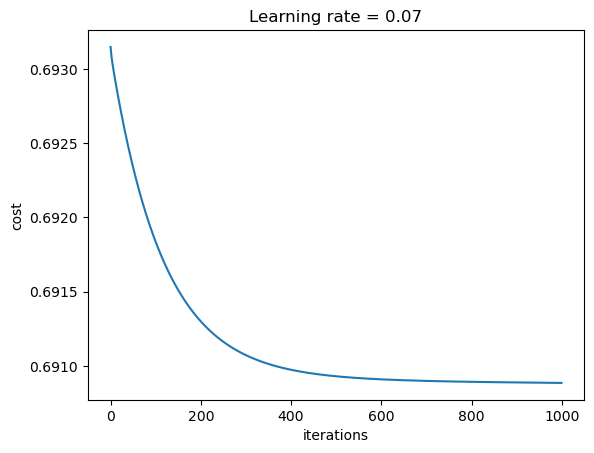

-------100000 training set-------------
Accurcy at 100000 training set:  0.50962


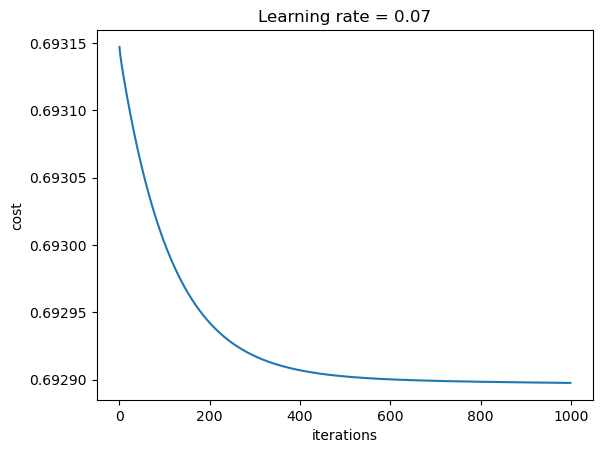

-------1000000 training set-------------
Accurcy at 1000000 training set:  0.50197


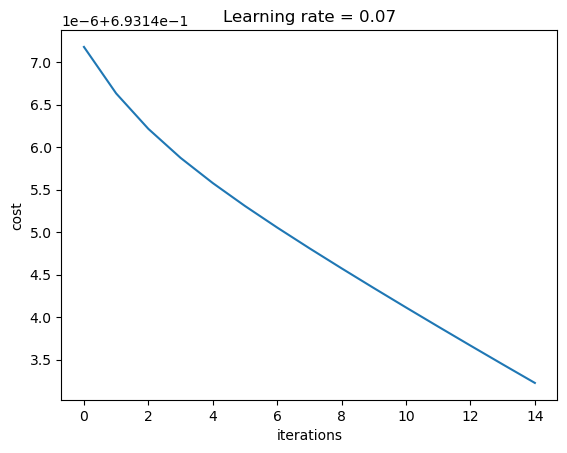

In [16]:
print('------- 10000 training set-------------')
print('Accurcy at 10000 training set: ', acc_s)
plt_res(lst_cost_s, 'cost', lr)

print('-------100000 training set-------------')
print('Accurcy at 100000 training set: ', acc_m)
plt_res(lst_cost_m, 'cost', lr)

print('-------1000000 training set-------------')
print('Accurcy at 1000000 training set: ', acc_l)
plt_res(lst_cost_l, 'cost', lr)